# Demo - pyTrigger
### Usage example

The purpose of this demo is to show the main functionalities and usages of the `trigger` python package.

The entire workflow of processing, indeed, is based on the correct usage of the object exposed by the package and called `TriggerDB`.

First of all, lets start by including the module in our python script as follow:


In [1]:
from trigger import TriggerDB

Now we can create an instance of the object by using a sequential code or a context (*recommended*).

The second option is recommended since it guarantees the correct *logout* of the account at the end of the execution.

| 🚩 Note                        |
|:-------------------------------|
| For the correct configuration of the database account, at the first usage of the object the package will ask us to insert a *email* and *password* credentials; these information will be saved into a secure location and they will be automatically used in any future setup |

In [2]:
with TriggerDB() as db:
  print(db)

[INFO] Credentials loaded successfully
[INFO] Logout success


As you can notice, an automatic logging of the status of the server is produced, highlighting the correct setup of the account and the final logout.

The `db` object has a series of private and public member functions: we discourage the usage of the private function unless particular needs.

The entire list of member functions could be listed below:

In [3]:
with TriggerDB() as db:
  print([x for x in dir(db) if not x.startswith('_')])

[INFO] Credentials loaded successfully
['accounts', 'columns', 'from_', 'num_elements', 'select', 'tables']
[INFO] Logout success


Each member function could be used to obtain a different set of information.

The main functionalities for the management of the database tables are described by the following functions:

* *tables* ➡️ Get the list of available tables
* *columns* ➡️ Get the list of available columns in the current table
* *accounts* ➡️ Get the list of available accounts

A common usage of the database, indeed, involves the extraction of records belonging to a particular user account, so, first of all, we need to know the available tables, the set of information stored in that table and the list of possible accounts to check.
Lets start by the list of available accounts:

In [4]:
with TriggerDB() as db:
  print(db.accounts())

[INFO] Credentials loaded successfully
[WARN] Maximum limit exceeded. Given 100000 against a maximum of 10000. Automated downgrade to the maximum value
[{'email': 'n.curti1'}, {'email': 'a.merlot'}, {'email': 'cnr00001'}, {'email': 'DE000003'}, {'email': 'CH000004'}, {'email': 'CH000005'}, {'email': 'GR000006'}, {'email': 'GR000007'}, {'email': 'GR000008'}, {'email': 'CH000009'}, {'email': 'DE000010'}, {'email': 'DE000011'}, {'email': 'GR000012'}, {'email': 'DE000013'}, {'email': 'DE000014'}, {'email': 'DE000015'}, {'email': 'GR000016'}, {'email': 'DE000017'}, {'email': 'GR000018'}, {'email': 'DE000019'}, {'email': 'DE000020'}, {'email': 'GR000021'}, {'email': 'DE000022'}, {'email': 'DE000023'}, {'email': 'DE000024'}, {'email': 'GR000025'}, {'email': 'GR000026'}, {'email': 'GR000027'}, {'email': 'GR000028'}, {'email': 'GR000029'}, {'email': 'GR000030'}, {'email': 'GR000031'}, {'email': 'GR000032'}, {'email': 'GR000033'}, {'email': 'GR000034'}, {'email': 'GR000035'}, {'email': 'GR000036

This is out first query on the database and you can notice that the output is a standard JSON made by a list of dictionaries.

To facilitate the readability of the output we can use the `pandas` package to convert it into a dataframe as follow:

In [5]:
import pandas as pd

with TriggerDB() as db:
  df = pd.json_normalize(db.accounts())

df

[INFO] Credentials loaded successfully
[WARN] Maximum limit exceeded. Given 100000 against a maximum of 10000. Automated downgrade to the maximum value
[INFO] Logout success


,email
0,n.curti1
1,a.merlot
2,cnr00001
3,DE000003
4,CH000004
...,...
140,GR000140
141,a.fuschi
142,GR000142
143,IT000143


In this way we can easily manipulate the amount of information get by the query and see the amount of accounts registered in the current database.

The next processing involves the available tables and information stored in them.

To this purpose we can use the combination of *tables* and *columns* member functions as follow:

In [6]:
with TriggerDB() as db:
  tables = db.tables()
  print(f'Available tables: {tables}')
  for tab in tables:
    print(f'  {tab}: {db.columns(tab)}')

[INFO] Credentials loaded successfully
Available tables: ['myair', 'ecg', 'ppg', 'gps', 'sleep', 'smartwatchlow', 'smartwatchhigh', 'accounts']
  myair: ['email', 'userId', 'year', 'month', 'day', 'hour', 'minute', 'second', 'pm1', 'pm25', 'pm10', 'pc03', 'pc05', 'pc1', 'pc25', 'pc5', 'pc10', 'temperature', 'humidity', 'pressure', 'sound', 'uvb', 'light']
  ecg: ['email', 'userId', 'year', 'month', 'day', 'hour', 'minute', 'second', 'microsecond', 'ecg']
  ppg: ['email', 'userId', 'year', 'month', 'day', 'hour', 'minute', 'second', 'microsecond', 'ppg']
  gps: ['email', 'userId', 'year', 'month', 'day', 'hour', 'minute', 'second', 'longitude', 'latitude', 'accuracy']
  sleep: ['email', 'userId', 'year', 'month', 'day', 'hour', 'minute', 'second', 'sleepduration', 'awake', 'insomnia', 'remsleep', 'lightsleep', 'deepsleep', 'sleepquality']
  smartwatchlow: ['email', 'userId', 'year', 'month', 'day', 'hour', 'minute', 'second', 'step', 'cal', 'bphigh', 'bplow', 'bodytemp']
  smartwatchhig

From this overview we can notice that each column has always an *email* column which lists the information get by our previous analysis about the amount of accounts.
The *email* information represents the **link** between the users and the information stored into the several tables and it could be used to extract the data associated to each account.

| 🚩 Note                        |
|:-------------------------------|
| The list of variable types is described in the online documentation available [here](https://trigger-io.difa.unibo.it/apiDocs.html) |

Starting from these information, we are now ready to perform our first (realistic) query on the database.

To this purpose, the `trigger` package provides two different interface: *standard* and *chaining*.

For a better readability of the code and a correct management of the desired query, we encourage the use of the *chaining* modality: for sake of completeness, the *standard* way can be easily addressed by calling the `select` member function of the object.

The chaining modality could be used by calling the `from_` member function which requires the table that we want to analyze.

In [7]:
with TriggerDB() as db:
  res = (
    db.from_('myair')
      .select('email', 'year', 'month', 'day', 'hour', 'minute', 'second', 'temperature', 'humidity', 'pressure')
      .where(year='=2025', month='=9', day='=10', hour='>=0', email='=DE000086')
      .order_by('second')
      .asc()
      .limit(10000)
      .fetch()
  )

df = pd.json_normalize(res)
df

[INFO] Credentials loaded successfully
[INFO] Logout success


,email,year,month,day,hour,minute,second,temperature,humidity,pressure
0,DE000086,2025,9,10,9,56,4,27,78,1015
1,DE000086,2025,9,10,10,0,4,28,60,1013
2,DE000086,2025,9,10,10,4,4,28,80,1013
3,DE000086,2025,9,10,10,8,4,29,54,991
4,DE000086,2025,9,10,10,12,4,28,52,965
...,...,...,...,...,...,...,...,...,...,...
340,DE000086,2025,9,10,11,58,4,27,78,1012
341,DE000086,2025,9,10,12,2,4,29,77,1012
342,DE000086,2025,9,10,12,6,4,30,76,1012
343,DE000086,2025,9,10,12,10,4,31,74,1012


| 🚩 Note                        |
|:-------------------------------|
| The execution time of the query is drastically affected by the amount of data stored in the database **and** by the `order_by` criteria; for this reasons also a "simple" query could require an execution time of the order of minutes (!) |

Now we can easily display the trend of the climate variables for the selected day:

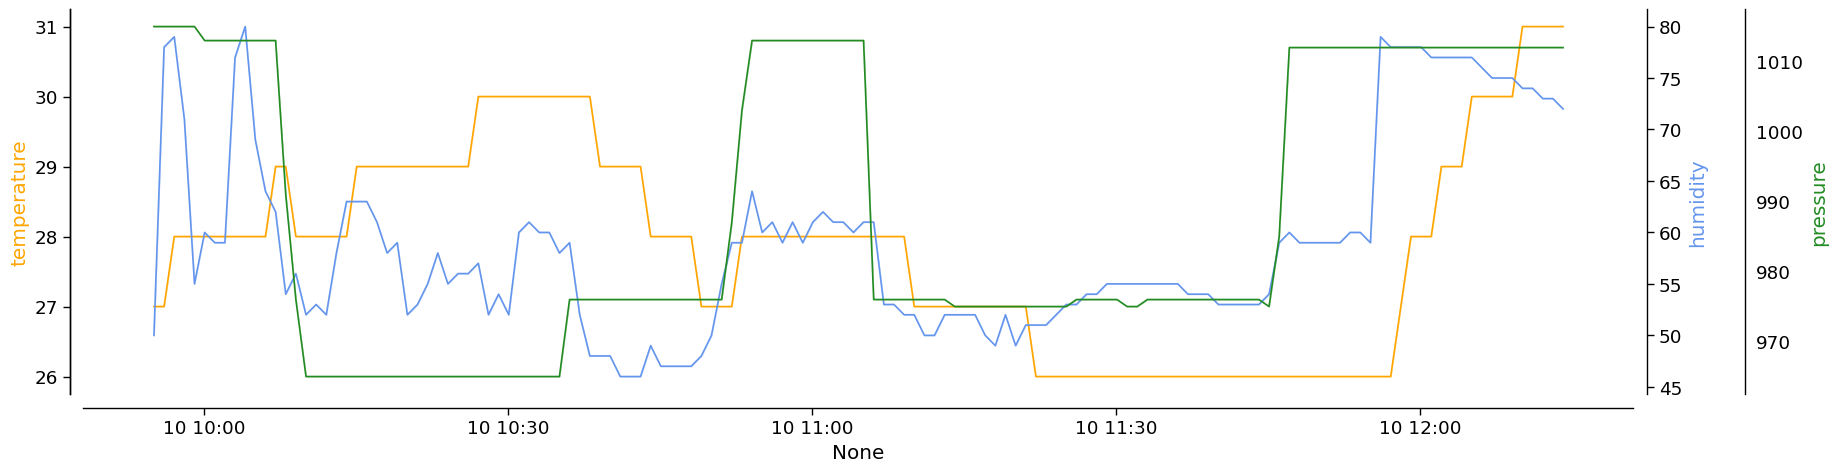

In [8]:
import pylab as plt
import seaborn as sns

time = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']], format='%Y-%m-%d %H:%M:%S.%f')

with sns.plotting_context('paper', font_scale=1.5):
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
  sns.lineplot(
    ax=ax,
    x=time,
    y=df['temperature'],
    color='orange',
  )
  ax1 = ax.twinx()
  sns.lineplot(
    ax=ax1,
    x=time,
    y=df['humidity'],
    color='cornflowerblue',
  )
  ax2 = ax.twinx()
  sns.lineplot(
    ax=ax2,
    x=time,
    y=df['pressure'],
    color='forestgreen',
  )
  sns.despine(
    ax=ax, 
    top=True, 
    right=True, 
    left=False, 
    bottom=False, 
    offset=10
  )
  sns.despine(
    ax=ax1, 
    top=True, 
    right=False, 
    left=False, 
    bottom=True, 
    offset=10
  )
  
  sns.despine(
    ax=ax2, 
    top=True, 
    right=False, 
    left=True, 
    bottom=True, 
    offset=80
  )

  ax.set_ylabel('temperature', color='orange')
  ax1.set_ylabel('humidity', color='cornflowerblue')
  ax2.set_ylabel('pressure', color='forestgreen')  